In [57]:
# binder https://hub.gke.mybinder.org/user/blychs-climatologia_fisica-dckeuhha/notebooks/practica2.ipynb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import copy
import datetime as dt
import calendar
import seaborn as sns
import regionmask
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib as mpl
#from funciones_meteo import load_file, ploteo_general, calculate_h

In [69]:
class Celda():
    def __init__(self, lat, lon):
        self.lat = lat
        self.lon = lon

In [3]:
def area_banda(lat1, lat2):
    """Calcula el area de una banda de latitudes"""
    r = 6371000
    cap = lambda x: 2 * np.pi * (6371000**2) * np.abs(np.sin(np.deg2rad(x)) - 1)
    a1 = cap(lat1)
    a2 = cap(lat2)
    return np.abs(cap(lat1) - cap(lat2))


def area_celda(lat, delta_lat=2.5, delta_lon=2.5):
    """Calcula el area de una celda de lat
    en base a una celda central"""
    return (np.abs(delta_lon) / 360 * area_banda(lat-(delta_lat/2),lat+(delta_lat/2)))


def regrid(xarray):
    """Lleva a una grilla con los puntos entre 2 puntos
    adyacentes de la original que tenemos"""
    new_grid = np.linspace(-88.75, 88.75, len(xarray.lat) - 1)
    return xarray.interp(lat=new_grid)

0.9997620270799091
510064471.90978825
509943090.3779732
Area banda 90-100 = 3.874512718475594
Area banda 80-90 = 11.505813047073914
Area banda 70-80 = 18.787515068459214
Area banda 60-70 = 25.49836795143073
Area banda 50-60 = 31.434465826994813
Area banda 40-50 = 36.4154433650128
Area banda 30-40 = 40.289956083488434
Area banda 20-30 = 42.94027887406869
Area banda 10-20 = 44.28588301988994
Area banda 0-10 = 44.28588301988994
Area banda -10-0 = 42.94027887406869
Area banda -20--10 = 40.289956083488434
Area banda -30--20 = 36.41544336501281
Area banda -40--30 = 31.43446582699475
Area banda -50--40 = 25.49836795143075
Area banda -60--50 = 18.78751506845925
Area banda -70--60 = 11.505813047073937
Area banda -80--70 = 3.8745127184755623


< GeoAxes: <cartopy.crs.PlateCarree object at 0x7fe389372bf0> >


False

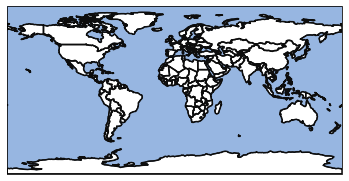

In [342]:
# Definicion de máscaras
pr_obs = xr.open_dataset('observacionales/precip.mon.total.v7_197601-200512_2.5_anu.nc')
mask_land = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(pr_obs.precip.isel(time=0))
mask_ocean = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isnan(pr_obs.precip.isel(time=0))
t_land = xr.open_dataset('observacionales/tmp_cru_ts3.20_197601-200512_2.5_anu.nc')
t_ocean = xr.open_dataset('observacionales/sst.mnmean.v4_197601-200512_2.5_anu.nc')
t_global = t_land.tmp.combine_first(t_ocean.sst)


#ax = plt.axes(projection=ccrs.PlateCarree())
#mask_land.where(mask_land.lat<11).where(mask_land.lat > -59).where(mask_land.lon>270).where(
#    mask_land.lon < 330).plot(transform=ccrs.PlateCarree())
#ax.coastlines()
#plt.show()

# ax = plt.axes(projection=ccrs.PlateCarree())
# 
# mask_north_am.plot(transform=ccrs.PlateCarree())
# ax.gridlines(label=True)
# ax.coastlines()
# plt.show()
# 
# ax = plt.axes(projection=ccrs.PlateCarree())
# 
# mask_south_am.plot(transform=ccrs.PlateCarree())
# ax.gridlines(label=True)
# ax.coastlines()
# plt.show()


mask_north_am = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             mask_land.lat > 11).where(mask_land.lon>185).where(
                             mask_land.lon < 310))
mask_north_am += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                              mask_land.where(mask_land == 1).where(
                              mask_land.lat > 59).where(mask_land.lon>=310).where(
                              mask_land.lon < 345))

mask_south_am = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             mask_land.lat < 11).where(mask_land.lon>270).where(
                             mask_land.lon < 330))


mask_africa = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             mask_land.lat<37).where(
                             mask_land.lat>-37).where(
                             mask_land.lon>340).where(mask_land.lon < 360))
mask_africa += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             mask_land.lat<37).where(
                             mask_land.lat>-37).where(
                             mask_land.lon>=0).where(mask_land.lon<32))
mask_africa += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             mask_land.lat<35).where(
                             mask_land.lat>-37).where(
                             mask_land.lon>=32).where(mask_land.lon<35))
mask_africa += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             mask_land.lat<27).where(
                             mask_land.lat>-37).where(
                             mask_land.lon>=35).where(mask_land.lon<37))
mask_africa += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             mask_land.lat<25).where(
                             mask_land.lat>-37).where(
                             mask_land.lon>=37).where(mask_land.lon<40))
mask_africa += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             mask_land.lat<20).where(
                             mask_land.lat>-37).where(
                             mask_land.lon>=40).where(mask_land.lon<42))
mask_africa += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             mask_land.lat<17).where(
                             mask_land.lat>-37).where(
                             mask_land.lon>=42).where(mask_land.lon<43))
mask_africa += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             mask_land.lat<11).where(
                             mask_land.lat>-37).where(
                             mask_land.lon>=43).where(mask_land.lon<55))

mask_europe = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             mask_land.lat>37).where(
                             mask_land.lat<70).where(
                             mask_land.lon>350).where(mask_land.lon < 360))
mask_europe += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             mask_land.lat>37).where(
                             mask_land.lat<80).where(
                             mask_land.lon>=0).where(mask_land.lon<32))
#mask_europe += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
#                             mask_land.where(mask_land == 1).where(
#                             mask_land.lat>37).where(
#                             mask_land.lat<80).where(
#                             mask_land.lon>=37).where(mask_land.lon<50))


#plt.figure(figsize=(20,10))
#ax = plt.axes(projection=ccrs.PlateCarree())
#mask_europe.plot()
# mask_land.where(mask_land.lat<22).where(mask_land.lat>-37).where(
#     mask_land.lon>=0).where(
#     mask_land.lon<42).plot(transform=ccrs.PlateCarree(), add_colorbar=False)
# mask_land.where(mask_land.lat<17).where(mask_land.lat>-37).where(
#     mask_land.lon>=0).where(
#     mask_land.lon<44).plot(transform=ccrs.PlateCarree(), add_colorbar=False)
# mask_land.where(mask_land.lat<11).where(mask_land.lat>-37).where(
#     mask_land.lon>=0).where(
#     mask_land.lon<55).plot(transform=ccrs.PlateCarree(), add_colorbar=False)
#ax.coastlines()
#ax.gridlines()
#plt.show()

In [4]:
# Load files CMIP5

pr_c5_hist = xr.open_mfdataset('NorESM1-M/pr_Amon_NorESM1-M_historical_r*i1p1_197601-200512_2.5_anu.nc',
                              combine='nested',
                              concat_dim='r')['pr']
pr_c5_ens = pr_c5_hist.mean(dim='r', keep_attrs=True)
pr_c5_26_close = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_anu.nc'
                                )['pr']
pr_c5_26_far = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_anu.nc'
                                )['pr']
pr_c5_85_close = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_anu.nc'
                                )['pr']
pr_c5_85_far = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_anu.nc'
                                )['pr']
# """"""""""""""""""""""""""""""""""""""""""
ev_c5_hist = xr.open_mfdataset('NorESM1-M/evspsbl_Amon_NorESM1-M_historical_r1i1p1_197601-200512_2.5_anu.nc',
                               combine='nested',
                               concat_dim='r')['evspsbl']
ev_c5_ens = ev_c5_hist.mean(dim='r', keep_attrs=True)
ev_c5_26_close = xr.open_dataset('NorESM1-M/evspsbl_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_anu.nc'
                                )['evspsbl']
ev_c5_26_far   = xr.open_dataset('NorESM1-M/evspsbl_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_anu.nc'
                                )['evspsbl']
ev_c5_85_close = xr.open_dataset('NorESM1-M/evspsbl_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_anu.nc'
                                )['evspsbl']
ev_c5_85_far   = xr.open_dataset('NorESM1-M/evspsbl_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_anu.nc'
                                )['evspsbl']
# """"""""""""""""""""""""""""""""""""""""""
ep_c5_hist = xr.open_mfdataset('NorESM1-M/etp_Amon_NorESM1-M_historical_r*i1p1_197601-200512_2.5_anu.nc',
                               combine='nested',
                               concat_dim='r')['etp']
ep_c5_ens = ep_c5_hist.mean(dim='r', keep_attrs=True)
ep_c5_26_close = xr.open_dataset('NorESM1-M/etp_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_anu.nc'
                                )['etp']
ep_c5_26_far   = xr.open_dataset('NorESM1-M/etp_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_anu.nc'
                                )['etp']
ep_c5_85_close = xr.open_dataset('NorESM1-M/etp_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_anu.nc'
                                )['etp']
ep_c5_85_far   = xr.open_dataset('NorESM1-M/etp_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_anu.nc'
                                )['etp']
# """"""""""""""""""""""""""""""""""""""""""""

t_c5_hist = xr.open_mfdataset('NorESM1-M/tas_Amon_NorESM1-M_historical_r*i1p1_197601-200512_2.5_anu.nc',
                              combine='nested',
                              concat_dim='r')['tas']
t_c5_ens = t_c5_hist.mean(dim='r', keep_attrs=True)
t_c5_26_close = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_anu.nc'
                               )['tas']
t_c5_26_far   = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_anu.nc'
                               )['tas']
t_c5_85_close = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_anu.nc'
                               )['tas']
t_c5_85_far   = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_anu.nc'
                               )['tas']
# """"""""""""""""""""""""""""""""""""""
q_c5_hist = xr.open_mfdataset('NorESM1-M/huss_historical_r*_anu.nc',
                            combine='nested',
                            concat_dim='r')['huss']
q_c5_ens = q_c5_hist.mean(dim='r', keep_attrs=True)
q_c5_26_close = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp26_r1_202001-204912_2.5_anu.nc'
                               )['huss']
q_c5_26_far   = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp26_r1_207001-209912_2.5_anu.nc'
                               )['huss']
q_c5_85_close = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp85_r1_202001-204912_2.5_anu.nc'
                               )['huss']
q_c5_85_far   = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp85_r1_207001-209912_2.5_anu.nc'
                               )['huss']

In [5]:
# Load files CMIP6
pr_c6_hist = xr.open_mfdataset('NorESM2-LM/pr_Amon_NorESM2-LM_historical_r*_2.5_mes.nc',
                              combine='nested',
                              concat_dim='r')['pr']
pr_c6_ens = pr_c6_hist.mean(dim='r', keep_attrs=True)
pr_c6_126_close = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_mes.nc'
                                 )['pr']
pr_c6_126_far   = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_mes.nc'
                                 )['pr']
pr_c6_585_close = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5_mes.nc'
                                 )['pr']
pr_c6_585_far   = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5_mes.nc'
                                 )['pr']
# """"""""""""""""""""""""""""""""""""""
ev_c6_hist = xr.open_mfdataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_historical_r*_2.5_mes.nc',
                               combine='nested',
                               concat_dim='r')['evspsbl']
ev_c6_ens = ev_c6_hist.mean(dim='r', keep_attrs=True)
ev_c6_126_close = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_mes.nc'
                                 )['evspsbl']
ev_c6_126_far   = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_mes.nc'
                                 )['evspsbl']
ev_c6_585_close = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp585_r1i1p1f1_gn_2020-2049_2.5_mes.nc'
                                 )['evspsbl']
ev_c6_585_far   = xr.open_dataset('NorESM2-LM/evspsbl_Amon_NorESM2-LM_ssp585_r1i1p1f1_gn_2070-2099_2.5_mes.nc'
                                 )['evspsbl']
# """"""""""""""""""""""""""""""""""""""
ep_c6_hist = xr.open_mfdataset('NorESM2-LM/etp_Amon_NorESM2-LM_historical_r*_2.5_anu.nc',
                               combine='nested',
                               concat_dim='r')['etp']
ep_c6_ens = ep_c6_hist.mean(dim='r', keep_attrs=True)
ep_c6_126_close = xr.open_dataset('NorESM2-LM/etp_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_anu.nc'
                                 )['etp']
ep_c6_126_far   = xr.open_dataset('NorESM2-LM/etp_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_anu.nc'
                                 )['etp']
ep_c6_585_close = xr.open_dataset('NorESM2-LM/etp_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5_anu.nc'
                                 )['etp']
ep_c6_585_far   = xr.open_dataset('NorESM2-LM/etp_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5_anu.nc'
                                 )['etp']
# """"""""""""""""""""""""""""""""""""""
t_c6_hist = xr.open_mfdataset('NorESM2-LM/tas_Amon_NorESM2-LM_historical_r*_2.5.nc',
                              combine='nested',
                              concat_dim='r')['tas']
t_c6_ens = t_c6_hist.mean(dim='r', keep_attrs=True)
t_c6_126_close = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc'
                                )['tas']
t_c6_126_far   = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc'
                                )['tas']
t_c6_585_close = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc'
                                )['tas']
t_c6_585_far   = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc'
                                )['tas']
# """"""""""""""""""""""""""""""""""""""
q_c6_hist = xr.open_mfdataset('NorESM2-LM/huss_Amon_NorESM2-LM_historical_r*_2.5.nc',
                              combine='nested',
                              concat_dim='r')['huss']
q_c6_ens = q_c6_hist.mean(dim='r', keep_attrs=True)
q_c6_126_close = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc'
                                )['huss']
q_c6_126_far   = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc'
                                )['huss']
q_c6_585_close = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc'
                                )['huss']
q_c6_585_far   = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc'
                                )['huss']
# """"""""""""""""""""""""""""""""""""""

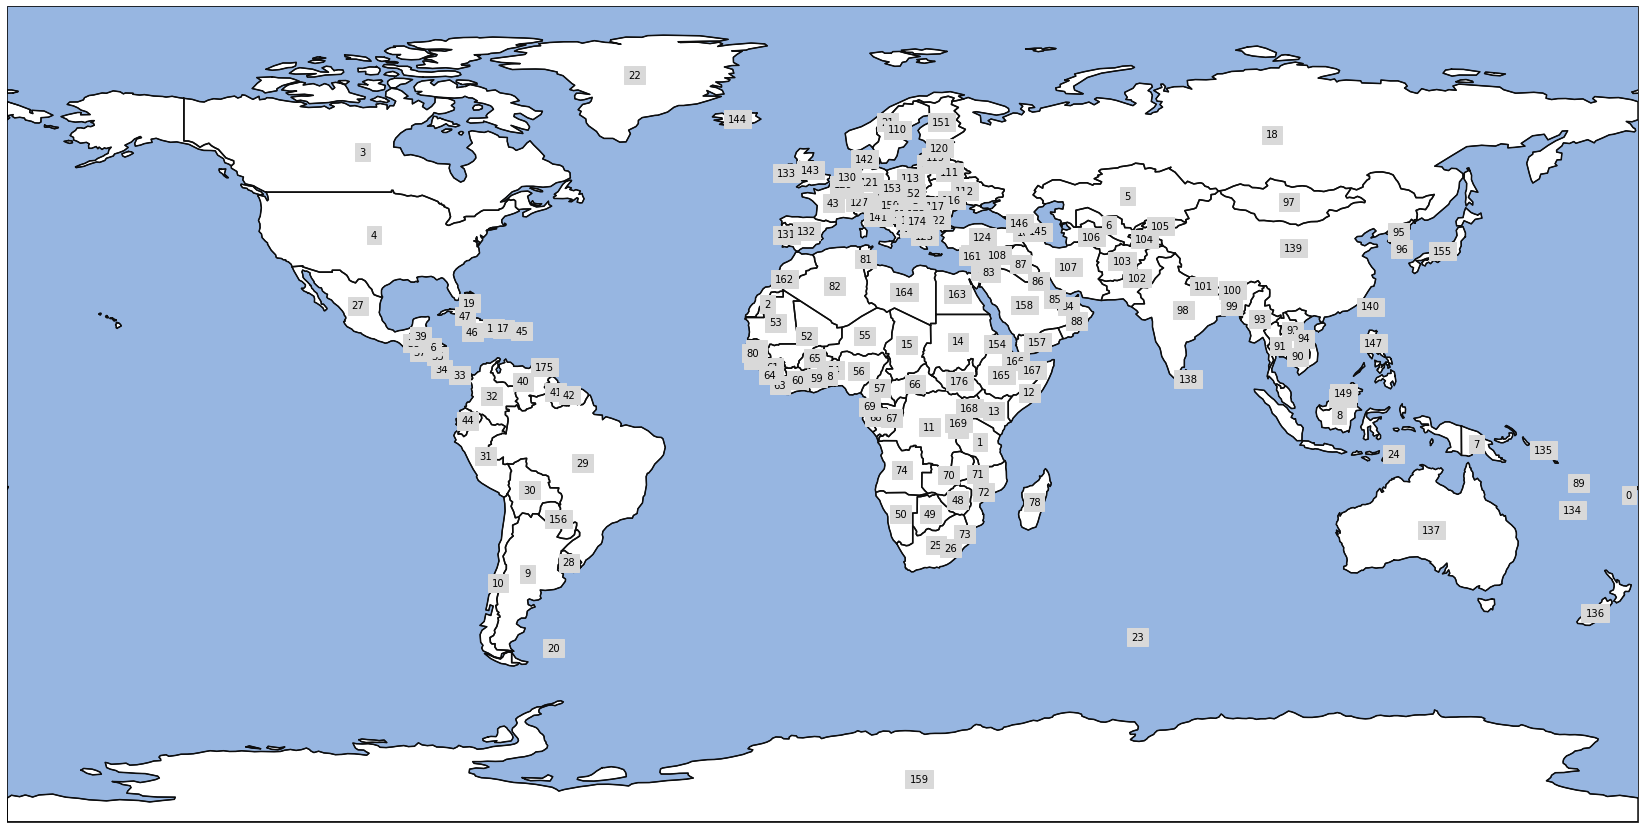

<bound method Regions.map_keys of 177 'Natural Earth Countries: 110m' Regions (http://www.naturalearthdata.com)
FJ TZ WS CA US KZ UZ PG INDO AR CL DRC SO KE SD TD HT DO RUS BS FK N GL TF TL ZA LS MX UY BR BO PE CO PA CR NI HN SV GT BZ VE GY SR F EC PR J CU ZW BW NA SN ML MR BJ NE NG CM TG GH CI GN GW LR SL BF CF CG GA GQ ZM MW MZ SW AO BI IS LB MG PAL GM TN DZ J AE QA KW IRQ OM VU KH TH LA MM VN KP KR MN IND BD BT NP PK AF TJ KG TM IRN SYR ARM S BY UA PL A HU MD RO LT LV EST D BG GR TR AL HR CH L B NL P E IRL NC SB NZ AU LK CN TW I DK GB IS AZ GE PH MY BN SLO FIN SK CZ ER J PY YE SA AQ CN CY MA EG LY ET DJ SL UG RW BiH MK RS ME KO TT SS>


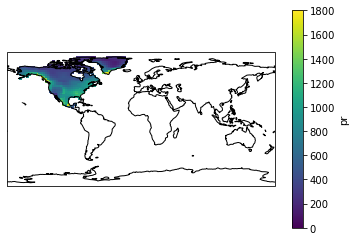

In [335]:
plt.figure(figsize=(30,15))
countries = regionmask.defined_regions.natural_earth.countries_110.plot()
#for i in range(len(countries)):
#    print(str(i) + ': ' + str(countries[i]))
plt.show()
#lat = np.arange(-90, 92.5, 2.5)
#lon = np.arange(0, 360, 2.5)
#mask = countries.mask(lon,lat)
#mask[3: 5].plot()

ax = plt.axes(projection = ccrs.PlateCarree())
mask = regionmask.defined_regions.natural_earth.countries_110.mask(pr_c5_ens)
print(regionmask.defined_regions.natural_earth.countries_110.map_keys)
pr_c5_ens.mean(dim='time').where(mask==3).plot(vmin=0, vmax=1800)
pr_c5_ens.mean(dim='time').where(mask==4).plot(vmin=0, vmax=1800, add_colorbar=False)
pr_c5_ens.mean(dim='time').where(mask==27).plot(vmin=0, vmax=1800, add_colorbar=False)
pr_c5_ens.mean(dim='time').where(mask==22).plot(vmin=0, vmax=1800, add_colorbar=False)
ax.coastlines()



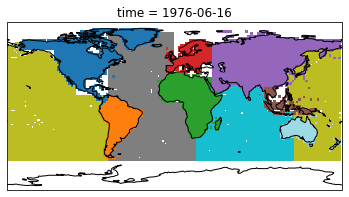

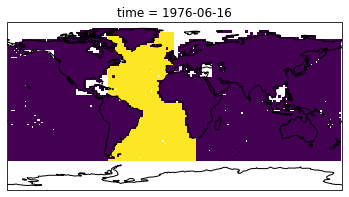

In [550]:
pr_obs = xr.open_dataset('observacionales/precip.mon.total.v7_197601-200512_2.5_anu.nc')
mask_land = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(pr_obs.precip.isel(time=0))
mask_ocean = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isnan(pr_obs.precip.isel(time=0))
t_land = xr.open_dataset('observacionales/tmp_cru_ts3.20_197601-200512_2.5_anu.nc')
t_ocean = xr.open_dataset('observacionales/sst.mnmean.v4_197601-200512_2.5_anu.nc')
t_global = t_land.tmp.combine_first(t_ocean.sst)


maskSR = regionmask.defined_regions.srex.mask(pr_c5_ens)
maskLND = regionmask.defined_regions.natural_earth.land_110.mask(pr_c5_ens)
#print(regionmask.defined_regions.srex.map_keys)
mask_NA = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             maskSR==1))
for i in range(2,7):
    mask_NA += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             maskSR==i))

mask_SA = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             maskSR==7))

for i in range(8,11):
        mask_SA += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             maskSR==i))
        

mask_EU = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             maskSR==11))

mask_EU += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                        mask_land.where(mask_land == 1).where(
                        maskSR==12))

mask_EU += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                        mask_land.where(mask_land == 1).where(
                        maskSR==13).where(mask_land.lat > 37).where(mask_land.lon < 30))

mask_EU += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                        mask_land.where(mask_land == 1).where(
                        maskSR==13).where(mask_land.lat > 37).where(mask_land.lon > 300))

mask_AF = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             maskSR==14))

mask_AF += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                        mask_land.where(mask_land == 1).where(
                        maskSR==13).where(mask_land.lat <= 37).where(mask_land.lon < 30))

mask_AF += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                        mask_land.where(mask_land == 1).where(
                        maskSR==13).where(mask_land.lat <= 37).where(mask_land.lon > 300))

for i in range(15,18):
        mask_AF += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             maskSR==i))
        
mask_AS = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             maskSR==18))

for i in range(19,24):
        mask_AS += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             maskSR==i))
mask_AS += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             mask_land.lat>70).where(mask_land.lon >= 35).where(mask_land.lon <=180))

mask_MA = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             maskSR==24))


mask_AU = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             maskSR==25))
mask_AU += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(mask_land == 1).where(
                             maskSR==26))

mask_AN = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                             mask_land.where(np.isfinite(maskLND)).where(mask_land.lat < -60))


mask_OA = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                            mask_ocean.where(mask_ocean==1).where(np.isnan(maskLND)).where(
                                mask_ocean.lon > 290).where(mask_ocean.lat<80).where(mask_ocean.lat>-60))

mask_OA += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                            mask_ocean.where(mask_ocean==1).where(np.isnan(maskLND)).where(
                                mask_ocean.lon >= 0).where(mask_ocean.lon < 25).where(
                                mask_ocean.lat<5).where(mask_ocean.lat>-60))

mask_OA += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                            mask_ocean.where(mask_ocean==1).where(np.isnan(maskLND)).where(
                                mask_ocean.lon <= 290).where(mask_ocean.lon > 288).where(
                                mask_ocean.lat < 80).where(mask_ocean.lat >- 60))

mask_OP = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                            mask_ocean.where(mask_land==0).where(
                                mask_ocean.lon < 290).where(mask_ocean.lon>180).where(
                                mask_ocean.lat>-60).where(mask_ocean.lat<11))
mask_OP += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                            mask_ocean.where(mask_ocean==1).where(
                                mask_ocean.lon < 255).where(mask_ocean.lon>180).where(
                                mask_ocean.lat>=11).where(mask_ocean.lat<70))
mask_OP += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                            mask_ocean.where(mask_ocean==1).where(
                                mask_ocean.lon < 180).where(mask_ocean.lon>120).where(
                                mask_ocean.lat>=0).where(mask_ocean.lat<70))
mask_OP += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                            mask_ocean.where(mask_ocean==1).where(
                                mask_ocean.lon < 180).where(mask_ocean.lon>=130).where(
                                mask_ocean.lat>-60).where(mask_ocean.lat<0))


mask_OI = 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                            mask_ocean.where(mask_ocean==1).where(np.isnan(maskLND)).where(
                                mask_ocean.lon < 130).where(mask_ocean.lon >= 25).where(
                                mask_ocean.lat>-60).where(mask_ocean.lat<-5))
mask_OI += 1 * np.ones((pr_obs.dims['lat'], pr_obs.dims['lon'])) * np.isfinite(
                            mask_ocean.where(mask_ocean==1).where(np.isnan(maskLND)).where(
                                mask_ocean.lon < 100).where(mask_ocean.lon>25).where(
                                mask_ocean.lat>=-5).where(mask_ocean.lat<25))



mask_all = mask_NA + 2 * mask_SA + 3 * mask_AF + 4 * mask_EU + 5 * mask_AS + 6 * mask_MA +\
           7 * mask_MA + 8 * mask_OA + 9 * mask_OP + 10 * mask_OI + 11 * mask_AU
mask_all = mask_NA + 2 * mask_SA + 3 * mask_AF + 4 * mask_EU + 5 * mask_AS + 6 * mask_MA +\
           8 * mask_OA + 9 * mask_OP + 10 * mask_OI + 11 * mask_AU
ax = plt.axes(projection=ccrs.PlateCarree())
mask_all.where(mask_all > 0).plot(cmap='tab20', add_colorbar=False)
ax.coastlines()
plt.show()
ax = plt.axes(projection=ccrs.PlateCarree())
mask_OA.where(mask_all > 0).plot(cmap='viridis', add_colorbar=False)
ax.coastlines()
plt.show()


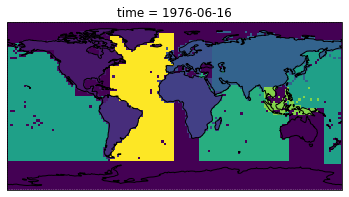

In [503]:
# ax = plt.axes(projection=ccrs.PlateCarree())
# mask_NA.plot()
# plt.title('Máscara Norteamérica')
# ax.coastlines()
# plt.show()
# 
# ax = plt.axes(projection=ccrs.PlateCarree())
# mask_SA.plot()
# plt.title('Máscara Norteamérica')
# ax.coastlines()
# plt.show()
# 
# ax = plt.axes(projection=ccrs.PlateCarree())
# mask_EU.plot()
# plt.title('Máscara Norteamérica')
# ax.coastlines()
# plt.show()
# 
# 
# ax = plt.axes(projection=ccrs.PlateCarree())
# mask_AF.plot()
# plt.title('Máscara Sudamérica')
# ax.coastlines()
# plt.show()
# 
# ax = plt.axes(projection=ccrs.PlateCarree())
# mask_AS.plot()
# plt.title('Máscara Australia')
# ax.coastlines()
# plt.show()
# 
# ax = plt.axes(projection=ccrs.PlateCarree())
# mask_MA.plot()
# plt.title('Máscara Continente Marítimo')
# ax.coastlines()
# plt.show()
# 
# ax = plt.axes(projection=ccrs.PlateCarree())
# mask_AU.plot()
# plt.title('Máscara Australia')
# ax.coastlines()
# plt.show()
# 
# ax = plt.axes(projection=ccrs.PlateCarree())
# mask_AN.plot()
# plt.title('Máscara Antártida')
# ax.coastlines()
# plt.show()
# 
# ax = plt.axes(projection=ccrs.PlateCarree())
# mask_OA.plot()
# plt.title('Máscara Atlántico')
# ax.coastlines()
# plt.show()
# 
# ax = plt.axes(projection=ccrs.PlateCarree())
# mask_OP.plot()
# plt.title('Máscara Pacífico')
# ax.coastlines()
# plt.show()
# 
# ax = plt.axes(projection=ccrs.PlateCarree())
# mask_OI.plot()
# plt.title('Máscara Océano Índico')
# ax.coastlines()
# plt.show()
# 
mask_all = mask_NA + 2 * mask_SA + 3 * mask_AF + 4 * mask_EU + 5 * mask_AS + 6 * mask_MA +\
           7 * mask_MA + 8 * mask_OA + 9 * mask_OP + 10 * mask_OI
ax = plt.axes(projection=ccrs.PlateCarree())
mask_all.plot(add_colorbar=False)
ax.coastlines()
plt.show()

In [59]:
list_pr_ev_c5 = [[pr_c5_hist, ev_c5_hist],
                 [pr_c5_26_close, ev_c5_26_close], [pr_c5_85_close, ev_c5_85_close],
                 [pr_c5_26_far, ev_c5_26_far],[pr_c5_85_far, ev_c5_85_far]]

list_pr_ev_c6 = [[pr_c6_hist, ev_c6_hist],
                 [pr_c6_126_close, ev_c6_126_close], [pr_c6_585_close, ev_c6_585_close],
                 [pr_c6_126_far, ev_c6_126_far],[pr_c6_585_far, ev_c6_585_far]]

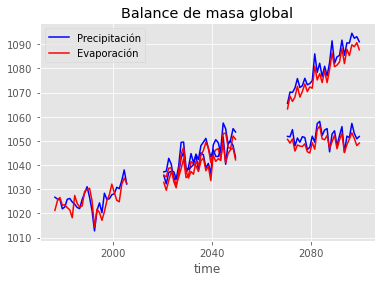

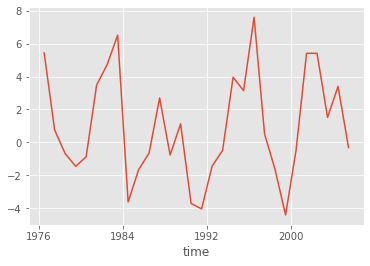

In [68]:
weights = np.cos(np.deg2rad(pr_c5_ens.lat))
media_pr_hist = pr_c5_ens.weighted(weights).mean(dim=('lat', 'lon'))
media_ev_hist = ev_c5_ens.weighted(weights).mean(dim=('lat', 'lon'))
with plt.style.context('ggplot'):
    media_pr_hist.plot(label='Precipitación', color='b')
    media_ev_hist.plot(label='Evaporación', color='r')
    plt.xlabel('Año')
    plt.ylabel('mm de agua')
    plt.legend()
    for i in range(1, len(list_pr_ev_c5)):
        list_pr_ev_c5[i][0].weighted(weights).mean(dim=('lat', 'lon')).plot(color='b')
        list_pr_ev_c5[i][1].weighted(weights).mean(dim=('lat', 'lon')).plot(color='r')
    plt.title('Balance de masa global')
    plt.show()
    (media_pesada_pr - media_pesada_ev).plot()

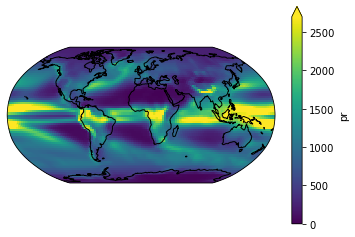

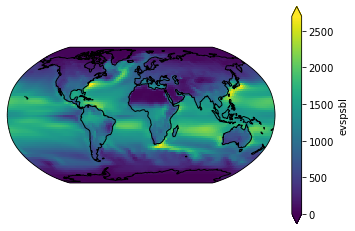

In [7]:
ax = plt.axes(projection=ccrs.Robinson())
pr_c5_ens.mean(dim='time').plot(vmin=0, vmax=2700, transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

#plt.figure(figsize=(19,10))
ax = plt.axes(projection=ccrs.Robinson())
(ev_c5_ens.mean(dim='time')).plot(vmin=0, vmax=2700, transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

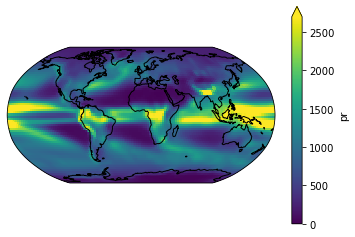

[-88.75 -86.25 -83.75 -81.25 -78.75 -76.25 -73.75 -71.25 -68.75 -66.25
 -63.75 -61.25 -58.75 -56.25 -53.75 -51.25 -48.75 -46.25 -43.75 -41.25
 -38.75 -36.25 -33.75 -31.25 -28.75 -26.25 -23.75 -21.25 -18.75 -16.25
 -13.75 -11.25  -8.75  -6.25  -3.75  -1.25   1.25   3.75   6.25   8.75
  11.25  13.75  16.25  18.75  21.25  23.75  26.25  28.75  31.25  33.75
  36.25  38.75  41.25  43.75  46.25  48.75  51.25  53.75  56.25  58.75
  61.25  63.75  66.25  68.75  71.25  73.75  76.25  78.75  81.25  83.75
  86.25  88.75]


In [8]:
pr = regrid(pr_c5_ens)
ax = plt.axes(projection=ccrs.Robinson())
pr.mean(dim='time').plot(vmin=0, vmax=2700, transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()
print(pr.lat.values)

In [37]:
#df_p_e = pd.Dataframe()

def tabla_bandas_latitud_peixoto(pr, ev):
    """Calcula tabla de Pr y Ev para bandas de
    longitud. Devuelve un DataFrame estilizado"""
    
    p_e_df = pd.DataFrame(columns=['Lat', 'Area', 'P', 'E', 'P-E', 'E/P', '(P-E)/P'])
    weights = np.cos(np.deg2rad(pr.lat))
    def nice_lat(lat):
        if lat < 0:
            nice = str(np.abs(lat)) + '°S'
        elif lat > 0:
            nice = str(np.abs(lat)) + '°N'
        elif lat == 0:
            nice = str(np.abs(lat)) + '°'
        return nice

    for i in range(90, -90, -10):
        precip = ((pr ).where(
                  pr.lat <= i).where(pr.lat > (i - 10)).weighted(
                  weights).mean(dim=('lat', 'lon', 'time')).values)
        evap = ((ev).where(
                ev.lat <= i).where(ev.lat > (i - 10)).weighted(
                weights).mean(dim=('lat', 'lon', 'time')).values)
        df2 = pd.DataFrame([[nice_lat(i - 10) + ' - ' + nice_lat((i)), 
                             area_banda(i, i-10) / 10**12,
                             precip, evap, precip-evap,
                             evap/precip, (precip-evap)/precip]],
                       columns=['Lat', 'Area', 'P', 'E', 'P-E', 'E/P', '(P-E)/P'])
        p_e_df =  p_e_df.append(df2)
    
    # Agrego hemisferio y globo
    precip = pr.where(pr.lat > 0).weighted(weights).mean(
                dim=('lat', 'lon', 'time')).values
    evap = ev.where(ev.lat > 0).weighted(weights).mean(
              dim=('lat', 'lon', 'time')).values
    df2 = pd.DataFrame([['HN', area_banda(0, 90) / 10**12,
                        precip, evap, precip-evap,
                        evap/precip, (precip-evap)/precip]],
                        columns=['Lat', 'Area', 'P', 'E', 'P-E', 'E/P', '(P-E)/P'])
    p_e_df =  p_e_df.append(df2)
    
    precip = pr.where(pr.lat < 0).weighted(weights).mean(
                dim=('lat', 'lon', 'time')).values
    evap = ev.where(ev.lat < 0).weighted(weights).mean(
              dim=('lat', 'lon', 'time')).values
    df2 = pd.DataFrame([['HS', area_banda(-90, 0) / 10**12,
                        precip, evap, precip-evap,
                        evap/precip, (precip-evap)/precip]],
                        columns=['Lat', 'Area', 'P', 'E', 'P-E', 'E/P', '(P-E)/P'])
    p_e_df =  p_e_df.append(df2)
    
    precip = pr.weighted(weights).mean(
                dim=('lat', 'lon', 'time')).values
    evap = ev.weighted(weights).mean(
              dim=('lat', 'lon', 'time')).values
    df2 = pd.DataFrame([['Globo', area_banda(-90, 90) / 10**12,
                        precip, evap, precip-evap,
                        evap/precip, (precip-evap)/precip]],
                        columns=['Lat', 'Area', 'P', 'E', 'P-E', 'E/P', '(P-E)/P'])
    p_e_df =  p_e_df.append(df2)
    return p_e_df.set_index('Lat')


,Area,P,E,P-E,E/P,(P-E)/P
Lat,,,,,,
80°N - 90°N,3.9,250,35,215,0.14,0.86
70°N - 80°N,11.5,347,126,221,0.36,0.64
60°N - 70°N,18.8,607,283,324,0.47,0.53
50°N - 60°N,25.5,813,513,300,0.63,0.37
40°N - 50°N,31.4,856,680,176,0.79,0.21
30°N - 40°N,36.4,908,"1,035",-127,1.14,-0.14
20°N - 30°N,40.3,596,"1,142",-546,1.92,-0.92
10°N - 20°N,42.9,"1,054","1,421",-367,1.35,-0.35
0° - 10°N,44.3,"1,992","1,387",606,0.70,0.30


In [40]:
def tabla_con_incertidumbres(df):
    df_out = df_

float64


In [44]:
print(np.average(runs[0]['E/P'][i]))

[0.84362483 0.84596094 0.84698554]


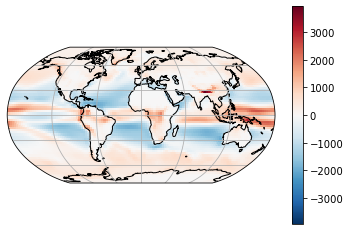

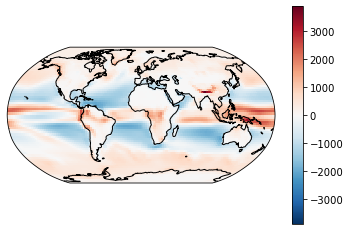

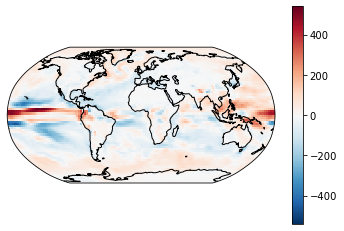

In [10]:
balance_agua_hist = pr_c5_ens - ev_c5_ens
ax = plt.axes(projection=ccrs.Robinson())
balance_agua_hist.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree())
ax.gridlines()
ax.coastlines()
plt.show()
balance_agua_85_close = pr_c5_85_close - ev_c5_85_close
ax = plt.axes(projection=ccrs.Robinson())
balance_agua_85_close.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree())
#ax.gridlines(draw_labels=True)
ax.coastlines()
plt.show()
ax = plt.axes(projection=ccrs.Robinson())
(balance_agua_85_close.mean(dim='time') - balance_agua_hist.mean(dim='time')).plot(
  transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()